# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        res = requests.get(city_url)
        city_weather = json.loads(res.text)


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambon
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | toccoa
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mattru
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | buraydah
Processing Record 14 of Set 1 | kolo
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | akyab
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | ziran

Processing Record 31 of Set 4 | sigli
Processing Record 32 of Set 4 | berlevag
Processing Record 33 of Set 4 | lincoln
Processing Record 34 of Set 4 | sorland
Processing Record 35 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 36 of Set 4 | yulara
Processing Record 37 of Set 4 | necochea
Processing Record 38 of Set 4 | suzu
City not found. Skipping...
Processing Record 39 of Set 4 | vao
Processing Record 40 of Set 4 | adrar
Processing Record 41 of Set 4 | almaznyy
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | ciudad bolivar
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | kailua
Processing Record 46 of Set 4 | viedma
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | aluksne
Processing Record 49 of Set 4 | goderich
Processing Record 0 of Set 5 | tiksi
Processing Record 1 of Set 5 | houma
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | kingaroy
Processing Record 4 of Set 5 | ali

Processing Record 24 of Set 8 | catu
Processing Record 25 of Set 8 | svetlyy
Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | babanusah
City not found. Skipping...
Processing Record 28 of Set 8 | san andres
Processing Record 29 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 30 of Set 8 | constitucion
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | narsaq
Processing Record 35 of Set 8 | oktyabrskoye
Processing Record 36 of Set 8 | san vicente de canete
Processing Record 37 of Set 8 | mecca
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | mayo
Processing Record 40 of Set 8 | fallon
Processing Record 41 of Set 8 | malibu
Processing Record 42 of Set 8 | komatipoort
Processing Record 43 of Set 8 | loandjili
Processing Record 44 of Set 8 | kuche
City not found. Skipping...
Processing Record 45 of

Processing Record 8 of Set 12 | bolivar
Processing Record 9 of Set 12 | vila
Processing Record 10 of Set 12 | chardara
Processing Record 11 of Set 12 | hammerfest
Processing Record 12 of Set 12 | nenjiang
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | douentza
Processing Record 15 of Set 12 | fengrun
Processing Record 16 of Set 12 | crab hill
City not found. Skipping...
Processing Record 17 of Set 12 | astoria
Processing Record 18 of Set 12 | muros
Processing Record 19 of Set 12 | grand gaube
Processing Record 20 of Set 12 | kraskino
Processing Record 21 of Set 12 | beruwala
Processing Record 22 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 23 of Set 12 | lokosovo
Processing Record 24 of Set 12 | wasilla
Processing Record 25 of Set 12 | inirida
Processing Record 26 of Set 12 | provost
Processing Record 27 of Set 12 | adzope
Processing Record 28 of Set 12 | manaure
Processing Record 29 of Set 12 | hami
Processing Record 30 of Se

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambon,-3.6954,128.1814,27.08,89,40,1.03,ID,1679967071
1,leningradskiy,69.3833,178.4167,-14.55,78,19,2.15,RU,1679967072
2,kapaa,22.0752,-159.3190,27.18,80,0,5.66,US,1679967072
3,tuatapere,-46.1333,167.6833,9.75,62,66,5.11,NZ,1679967073
4,toccoa,34.5773,-83.3324,21.80,28,0,2.57,US,1679967000


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\u0880169\\python-api-challenge\\WeatherPy\\cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\u0880169\\python-api-challenge\\WeatherPy\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambon,-3.6954,128.1814,27.08,89,40,1.03,ID,1679967071
1,leningradskiy,69.3833,178.4167,-14.55,78,19,2.15,RU,1679967072
2,kapaa,22.0752,-159.3190,27.18,80,0,5.66,US,1679967072
3,tuatapere,-46.1333,167.6833,9.75,62,66,5.11,NZ,1679967073
4,toccoa,34.5773,-83.3324,21.80,28,0,2.57,US,1679967000


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

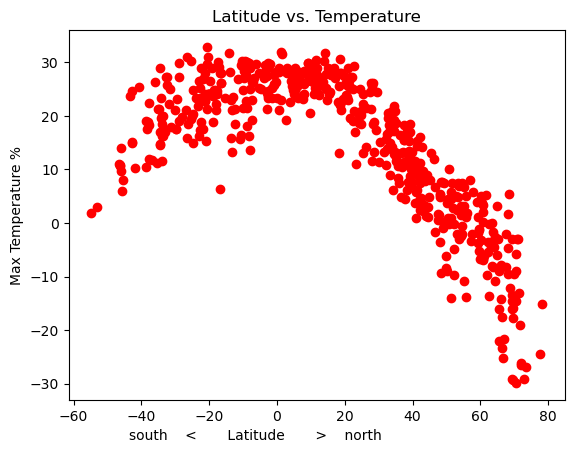

In [37]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = "r", marker = "o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("south    <       Latitude       >    north                            ")
plt.ylabel("Max Temperature %")
plt.title("Latitude vs. Temperature")
# Save the figure
plt.savefig("C:\\Users\\u0880169\\python-api-challenge\\WeatherPy\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

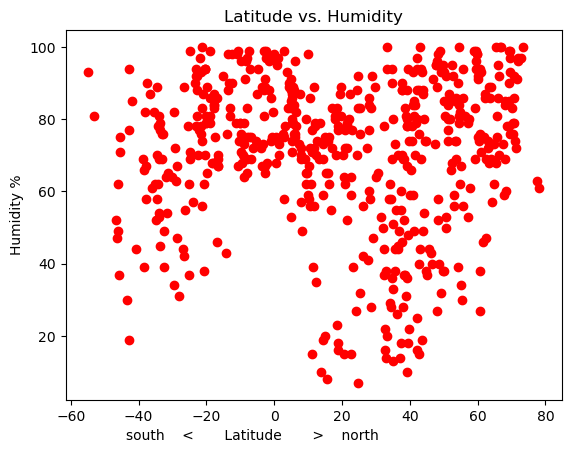

In [38]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = "r", marker = "o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("south    <       Latitude       >    north                            ")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")
# Save the figure
plt.savefig("C:\\Users\\u0880169\\python-api-challenge\\WeatherPy\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

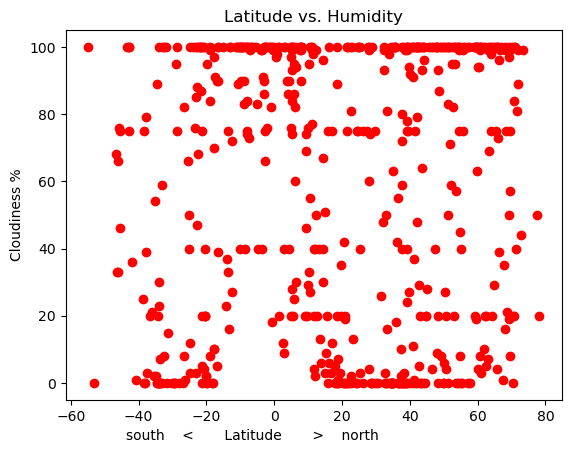

In [39]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = "r", marker = "o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("south    <       Latitude       >    north                            ")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Humidity")
# Save the figure
plt.savefig("C:\\Users\\u0880169\\python-api-challenge\\WeatherPy\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

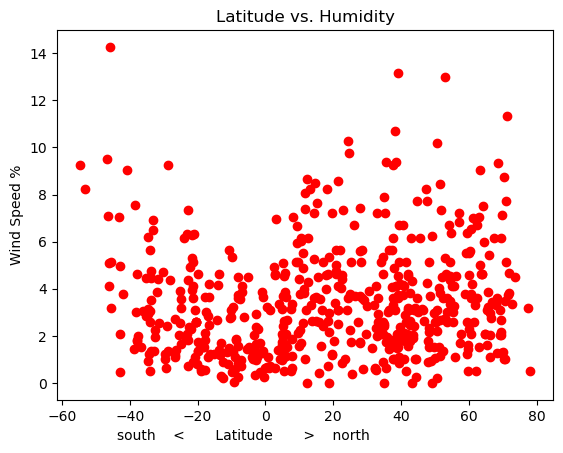

In [40]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = "r", marker = "o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("south    <       Latitude       >    north                            ")
plt.ylabel("Wind Speed %")
plt.title("Latitude vs. Humidity")
# Save the figure
plt.savefig("C:\\Users\\u0880169\\python-api-challenge\\WeatherPy\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def show_linegress(x_label, x_value, y_label, y_value):
    slope, intercept, r, p, std_err = linregress(x_value, y_value)
    trend = slope * x_value + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,trend,"-", color="r")
    xmin, xmax, ymin, ymax = plt.axis()
    an_x = xmin + (xmax-xmin)/10
    an_y = ymin + (ymax-ymin)/10
    plt.annotate(line_eq,(an_x, an_y),fontsize=13,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {r}")

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,leningradskiy,69.3833,178.4167,-14.55,78,19,2.15,RU,1679967072
2,kapaa,22.0752,-159.3190,27.18,80,0,5.66,US,1679967072
4,toccoa,34.5773,-83.3324,21.80,28,0,2.57,US,1679967000
6,mattru,7.6244,-11.8332,23.98,87,99,0.49,SL,1679967074
7,cherskiy,68.7500,161.3000,-12.09,78,21,9.34,RU,1679967074


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambon,-3.6954,128.1814,27.08,89,40,1.03,ID,1679967071
3,tuatapere,-46.1333,167.6833,9.75,62,66,5.11,NZ,1679967073
5,rikitea,-23.1203,-134.9692,26.49,78,85,6.31,PF,1679967073
10,ushuaia,-54.8000,-68.3000,1.81,93,100,9.26,AR,1679967076
11,lebu,-37.6167,-73.6500,11.93,90,3,2.01,CL,1679967077


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9173120904685836


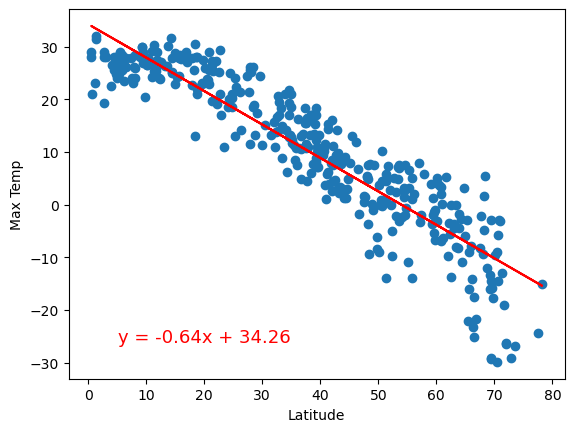

In [44]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", northern_hemi_df["Lat"], "Max Temp", northern_hemi_df["Max Temp"])

The r-value is: 0.5910096080110727


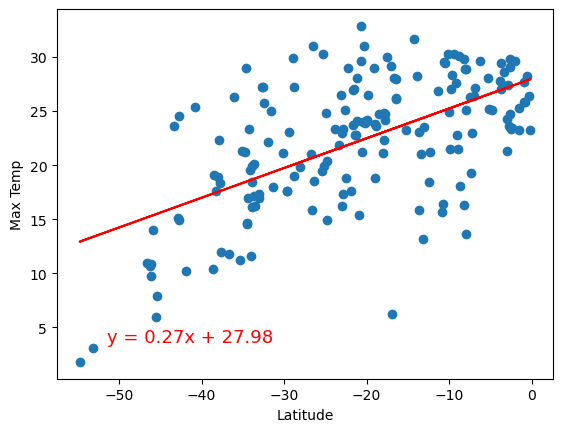

In [45]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", southern_hemi_df["Lat"], "Max Temp", southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** We can see the tempature in colder towards the poles of the earth and warmer closer to the equador

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13449763345248736


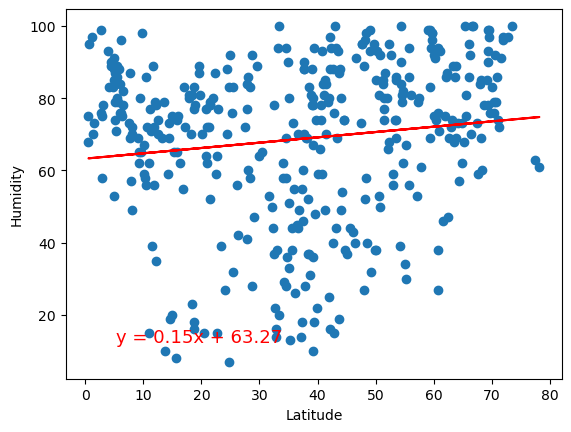

In [46]:
# Northern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", northern_hemi_df["Lat"], "Humidity", northern_hemi_df["Humidity"])

The r-value is: 0.41876151110587695


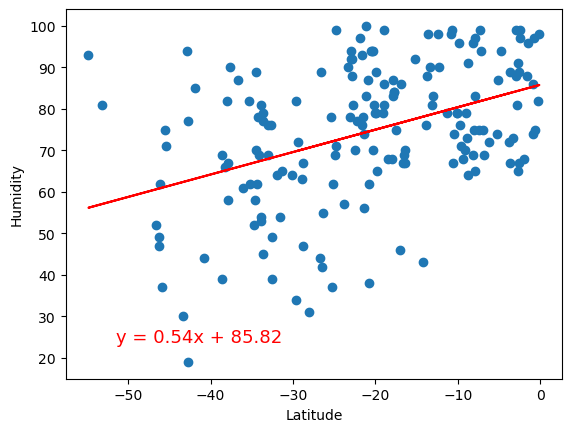

In [47]:
# Southern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", southern_hemi_df["Lat"], "Humidity", southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** We can see more humidity towards south and less towards the north. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06107296702360835


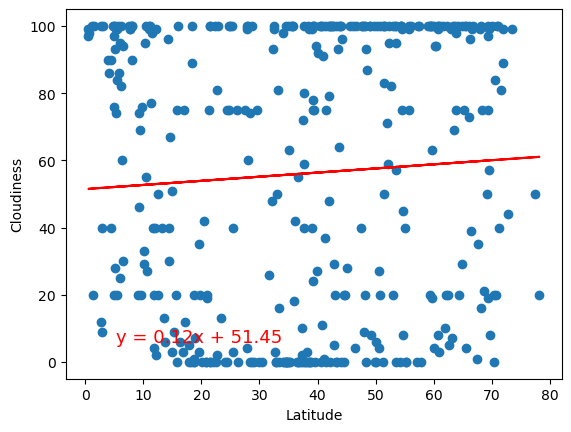

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", northern_hemi_df["Lat"], "Cloudiness", northern_hemi_df["Cloudiness"])

The r-value is: 0.4164981191146365


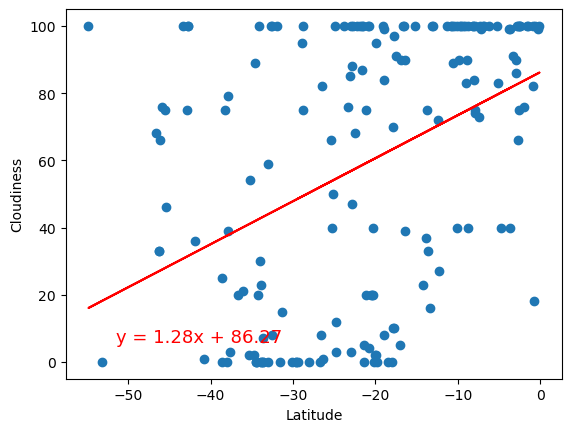

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", southern_hemi_df["Lat"], "Cloudiness", southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** We can see more less clouds in north than the south. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07831469303623177


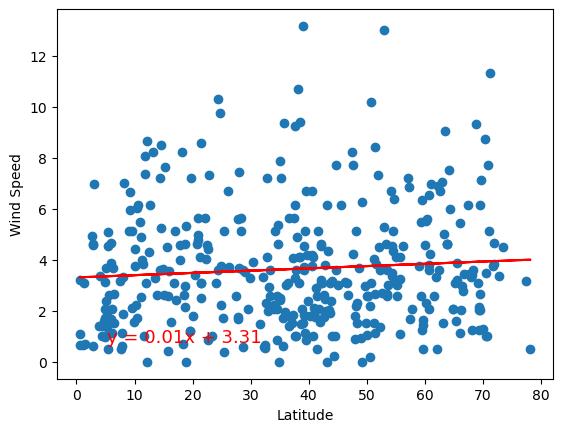

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", northern_hemi_df["Lat"], "Wind Speed", northern_hemi_df["Wind Speed"])

The r-value is: -0.46710571616234264


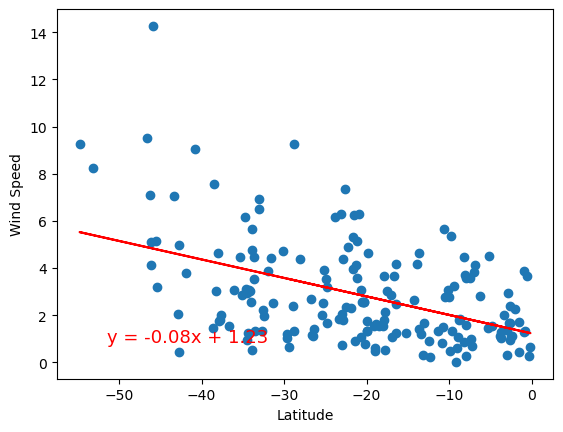

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
show_linegress("Latitude", southern_hemi_df["Lat"], "Wind Speed", southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** We can see pretty lateral wind speed in north. South is more depening on which direction you go. 